# Pima Indians Diabetes Database

In [ ]:
#Import the library
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [2]:
#donwload the dataset
diabetes = pd.read_csv('pima-indians-diabetes.csv')

In [3]:
# Let's see a preview of the data
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [4]:
#Info of the dataset
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
Number_pregnant          768 non-null int64
Glucose_concentration    768 non-null float64
Blood_pressure           768 non-null float64
Triceps                  768 non-null float64
Insulin                  768 non-null float64
BMI                      768 non-null float64
Pedigree                 768 non-null float64
Age                      768 non-null int64
Class                    768 non-null int64
Group                    768 non-null object
dtypes: float64(6), int64(3), object(1)
memory usage: 60.1+ KB


In [ ]:
#Define the label and the data of the dataset
labels = diabetes['Class']
x_data = diabetes.drop('Class',axis=1)

In [7]:
#Count the number the cases with diabetes and without diabetes
diabetes['Class'].value_counts()

0    500
1    268
Name: Class, dtype: int64

/anaconda3/envs/riccardo/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


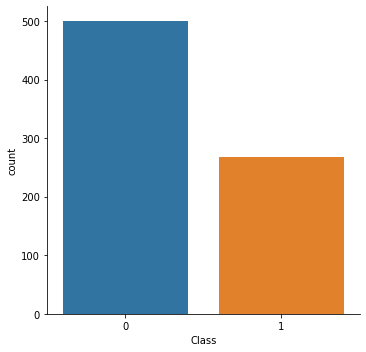

In [9]:
#plot the the number the cases with diabetes and without diabetes
sns.factorplot('Class',data=diabetes, kind="count")

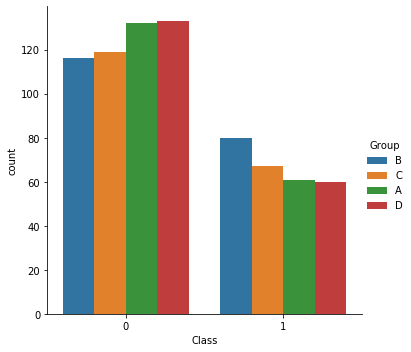

In [10]:
#Let's separate the diabetes case by group(A B C D)
sns.factorplot('Class',data=diabetes, kind="count",hue='Group')

In [ ]:
#Print the minimum and maximum age of the dataset
print("min age: ",min(diabetes['Age']))
print("max age: ",max(diabetes['Age']))

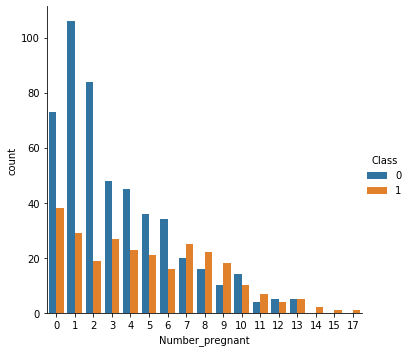

In [11]:
#Count the diabete's number for each  'Number_pregnant'
sns.factorplot('Number_pregnant',data=diabetes, kind="count",hue='Class')

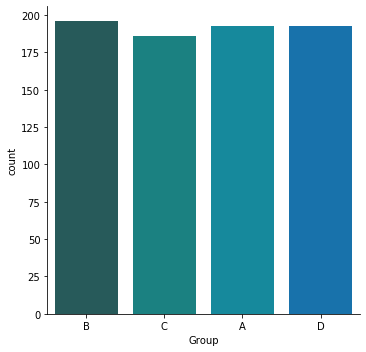

In [12]:
#Count the diabete's number for each group (A B C D)
sns.factorplot('Group',data=diabetes,kind="count",palette='winter_d')

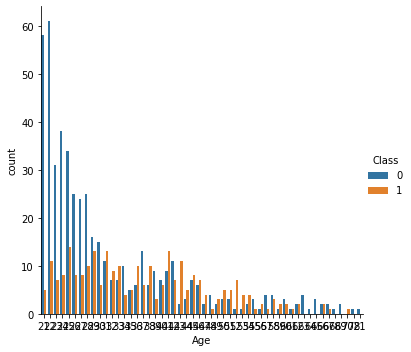

In [13]:
#Count the diabete's number for each age 
sns.factorplot('Age',data=diabetes, kind="count",hue='Class')

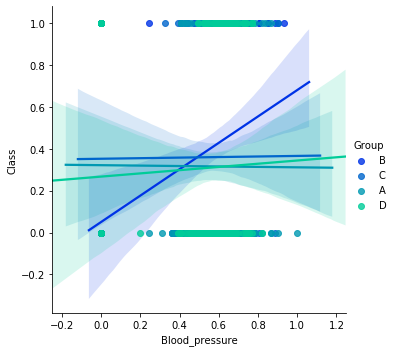

In [14]:
# Let's use a linear plot on 'Blood_pressure' versus Class using hue for Group
sns.lmplot('Blood_pressure','Class',data=diabetes,hue='Group',palette='winter')

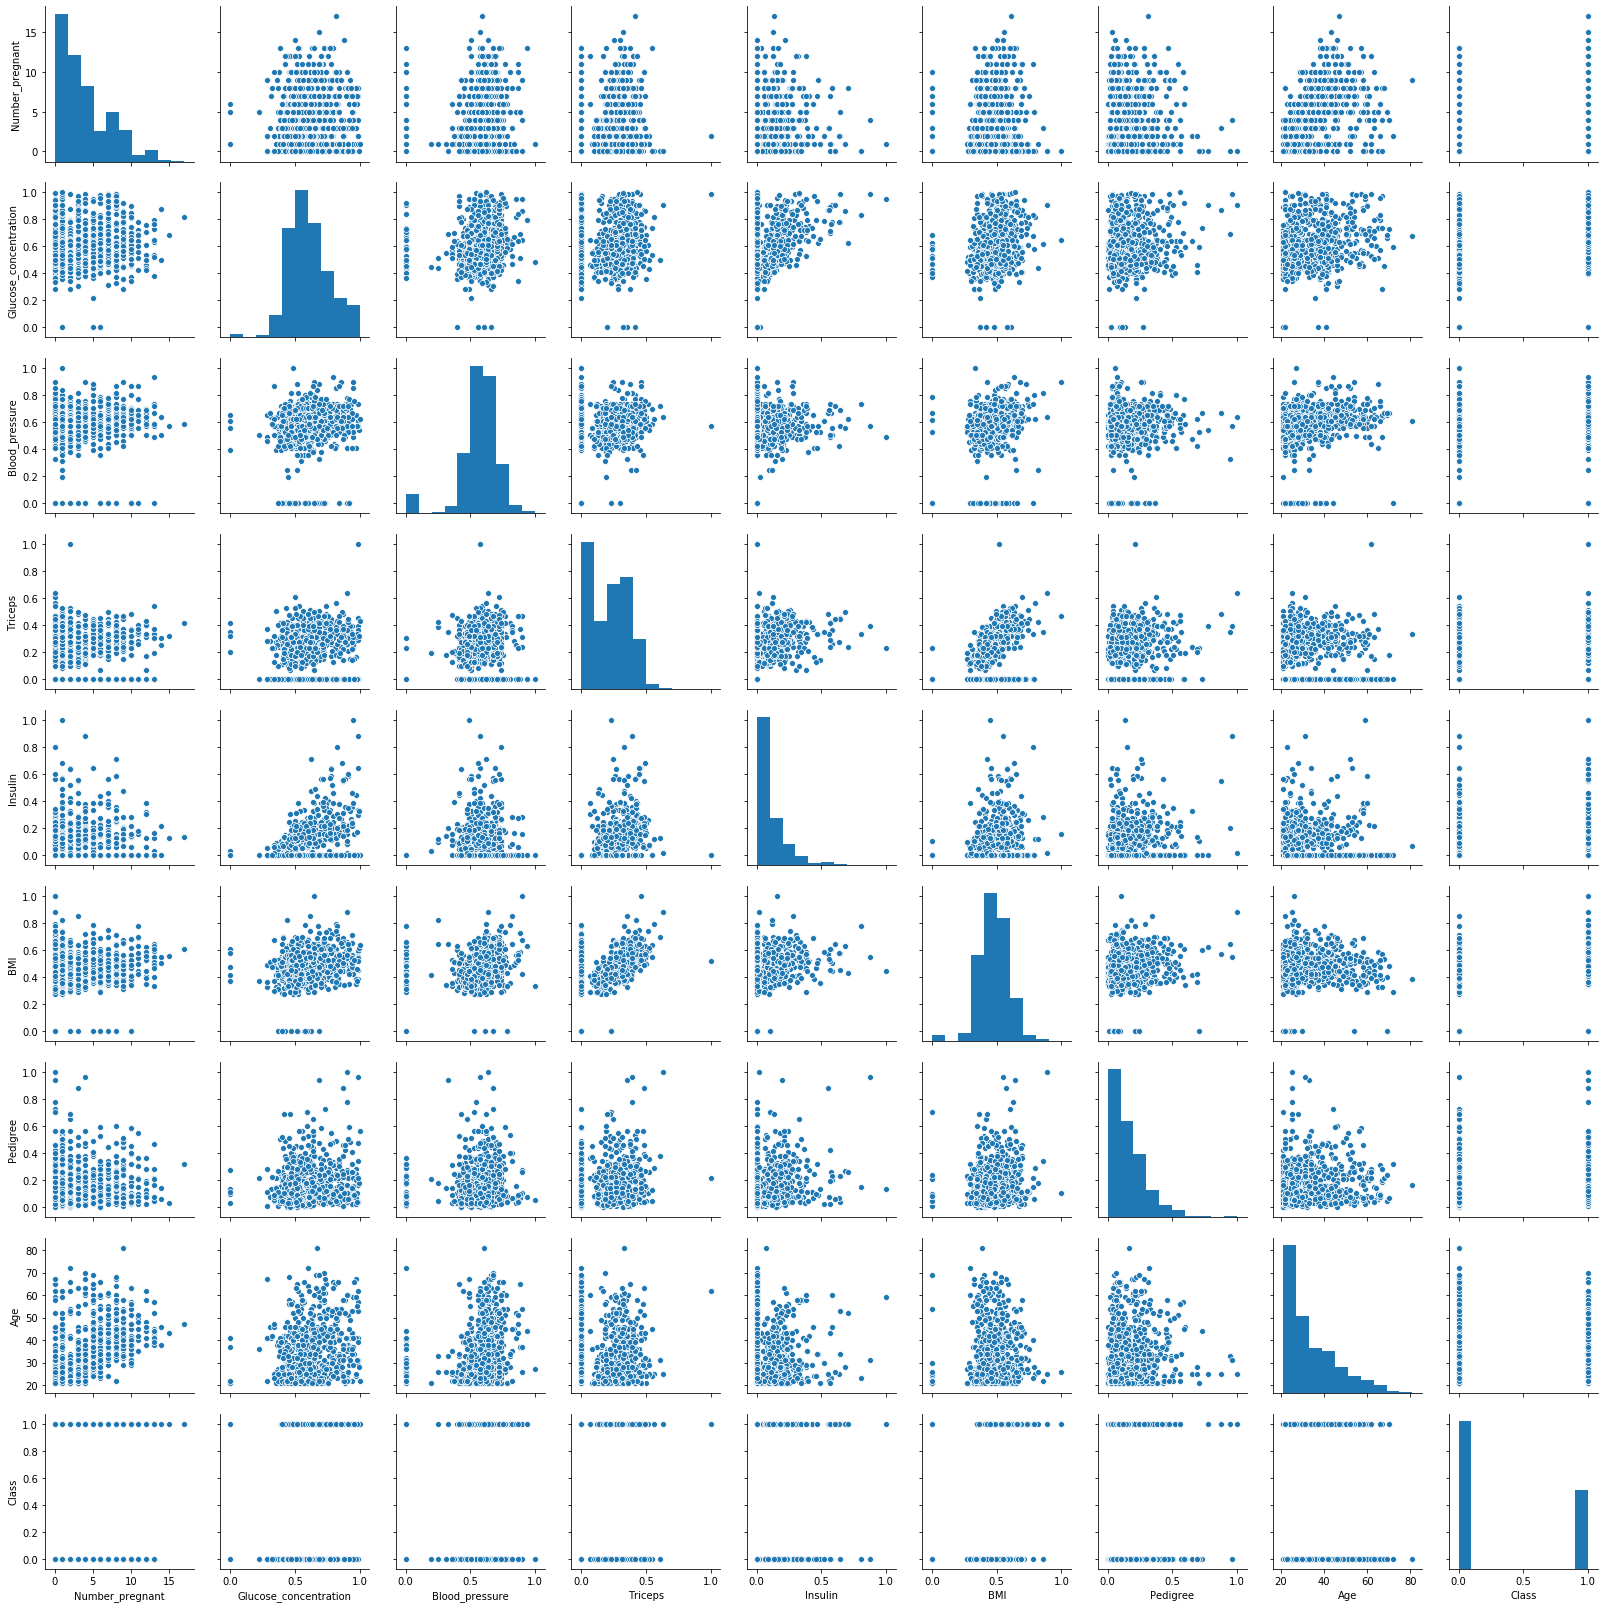

In [15]:
# Let's pairplot on  DataFrame for all the comparisons of the variables
sns.pairplot(diabetes)

In [16]:
x_data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,C


In [17]:
#Let's define a function for to convert a categorical label in numerical label 
def new_group(group):
    
    new_group_ = group

    if new_group_ == 'A':
        return 1
    if new_group_ == 'B':
        return 2
    if new_group_ == 'C':
        return 3
    if new_group_ == 'D':
        return 4

In [18]:
#Apply the new function
x_data['Group'] = x_data['Group'].apply(new_group)

In [19]:
#Let's see the new dataframe
x_data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,2
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,3
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,2
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,2
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,3


In [20]:
#Preprosessing
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(x_data)

In [21]:
X_standardized = scaler.transform(x_data)
data = pd.DataFrame(X_standardized)
data.head()

,0,1,2,3,4,5,6,7,8
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,-0.440481
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0.452103
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,-0.440481
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,-0.440481
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,0.452103


In [22]:
#Split the Dataframe (70% train and 30% test )
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size = 0.3, random_state = 12345)

In [23]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(537, 9)
(537,)
(231, 9)
(231,)


In [24]:
#Let's convert from dataframe to numpy
x_train_np = np.array(x_train)
y_train_np = np.array(y_train)
x_test_np = np.array(x_test)
y_test_np = np.array(y_test)

In [25]:
type(x_train_np)

numpy.ndarray

In [26]:
#Let's convert from numpy to tensorflow
train_x, test_x = tf.cast(x_train_np, tf.float32), tf.cast(x_test_np, tf.float32)
train_y, test_y = tf.cast(y_train_np,tf.int64),tf.cast(y_test_np,tf.int64)

In [27]:
batch_size = 20 # define a batch size
epochs=1000 #define the epochs

In [28]:
#Build the deep learning model

class MyModel(tf.keras.Model):
    def __init__(self, num_classes=2):
        super(MyModel, self).__init__()
   # Define your layers here.
        inputs = tf.keras.Input(shape=[train_x.shape[1]])  # Returns a placeholder tensor
        self.x0 = tf.keras.layers.Flatten()
        self.x1 = tf.keras.layers.Dense(10, activation='relu',name='d1')
        self.x2 = tf.keras.layers.Dense(5, activation='relu',name='d2')
        self.x3 = tf.keras.layers.Dense(5, activation='relu',name='d3')
        self.predictions = tf.keras.layers.Dense(2,activation=tf.nn.softmax, name='d2')
    def call(self, inputs):

        x = self.x0(inputs)
        x = self.x1(x)
        x = self.x2(x)
        x = self.x3(x)
        return self.predictions(x)

In [29]:
model = MyModel()

In [30]:
#Define the  optimizers and compile the model
optimiser = tf.keras.optimizers.Adam()
model.compile (optimizer= optimiser, loss='sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(train_x, train_y, batch_size=batch_size, epochs=epochs)

Epoch 1/1000
537/537 [==============================] - 0s 417us/sample - loss: 0.6895 - accuracy: 0.5959
Epoch 2/1000
537/537 [==============================] - 0s 89us/sample - loss: 0.6706 - accuracy: 0.6555
Epoch 3/1000
537/537 [==============================] - 0s 88us/sample - loss: 0.6551 - accuracy: 0.6704
Epoch 4/1000
537/537 [==============================] - 0s 98us/sample - loss: 0.6417 - accuracy: 0.6667
Epoch 5/1000
537/537 [==============================] - 0s 89us/sample - loss: 0.6281 - accuracy: 0.6574
Epoch 6/1000
537/537 [==============================] - 0s 85us/sample - loss: 0.6136 - accuracy: 0.6611
Epoch 7/1000
537/537 [==============================] - 0s 91us/sample - loss: 0.5989 - accuracy: 0.6667
Epoch 8/1000
537/537 [==============================] - 0s 98us/sample - loss: 0.5845 - accuracy: 0.6778
Epoch 9/1000
537/537 [==============================] - 0s 88us/sample - loss: 0.5695 - accuracy: 0.6909
Epoch 10/1000
537/537 [==============================]

537/537 [==============================] - 0s 79us/sample - loss: 0.3506 - accuracy: 0.8343
Epoch 155/1000
537/537 [==============================] - 0s 82us/sample - loss: 0.3511 - accuracy: 0.8399
Epoch 156/1000
537/537 [==============================] - 0s 82us/sample - loss: 0.3494 - accuracy: 0.8343
Epoch 157/1000
537/537 [==============================] - 0s 74us/sample - loss: 0.3496 - accuracy: 0.8343
Epoch 158/1000
537/537 [==============================] - 0s 77us/sample - loss: 0.3500 - accuracy: 0.8436
Epoch 159/1000
537/537 [==============================] - 0s 76us/sample - loss: 0.3478 - accuracy: 0.8399
Epoch 160/1000
537/537 [==============================] - 0s 72us/sample - loss: 0.3479 - accuracy: 0.8361
Epoch 161/1000
537/537 [==============================] - 0s 79us/sample - loss: 0.3487 - accuracy: 0.8399
Epoch 162/1000
537/537 [==============================] - 0s 75us/sample - loss: 0.3453 - accuracy: 0.8473
Epoch 163/1000
537/537 [============================

537/537 [==============================] - 0s 74us/sample - loss: 0.2838 - accuracy: 0.8864
Epoch 307/1000
537/537 [==============================] - 0s 76us/sample - loss: 0.2840 - accuracy: 0.8790
Epoch 308/1000
537/537 [==============================] - 0s 82us/sample - loss: 0.2813 - accuracy: 0.8808
Epoch 309/1000
537/537 [==============================] - 0s 80us/sample - loss: 0.2818 - accuracy: 0.8845
Epoch 310/1000
537/537 [==============================] - 0s 74us/sample - loss: 0.2822 - accuracy: 0.8864
Epoch 311/1000
537/537 [==============================] - 0s 76us/sample - loss: 0.2821 - accuracy: 0.8864
Epoch 312/1000
537/537 [==============================] - 0s 75us/sample - loss: 0.2820 - accuracy: 0.8790
Epoch 313/1000
537/537 [==============================] - 0s 70us/sample - loss: 0.2815 - accuracy: 0.8827
Epoch 314/1000
537/537 [==============================] - 0s 88us/sample - loss: 0.2818 - accuracy: 0.8790
Epoch 315/1000
537/537 [============================

537/537 [==============================] - 0s 76us/sample - loss: 0.2480 - accuracy: 0.9032
Epoch 459/1000
537/537 [==============================] - 0s 72us/sample - loss: 0.2481 - accuracy: 0.9050
Epoch 460/1000
537/537 [==============================] - 0s 79us/sample - loss: 0.2474 - accuracy: 0.9069
Epoch 461/1000
537/537 [==============================] - 0s 75us/sample - loss: 0.2498 - accuracy: 0.9050
Epoch 462/1000
537/537 [==============================] - 0s 77us/sample - loss: 0.2460 - accuracy: 0.9013
Epoch 463/1000
537/537 [==============================] - 0s 77us/sample - loss: 0.2468 - accuracy: 0.9050
Epoch 464/1000
537/537 [==============================] - 0s 72us/sample - loss: 0.2448 - accuracy: 0.8994
Epoch 465/1000
537/537 [==============================] - 0s 79us/sample - loss: 0.2450 - accuracy: 0.9050
Epoch 466/1000
537/537 [==============================] - 0s 74us/sample - loss: 0.2456 - accuracy: 0.9050
Epoch 467/1000
537/537 [============================

537/537 [==============================] - 0s 83us/sample - loss: 0.2275 - accuracy: 0.9143
Epoch 611/1000
537/537 [==============================] - 0s 75us/sample - loss: 0.2273 - accuracy: 0.9218
Epoch 612/1000
537/537 [==============================] - 0s 89us/sample - loss: 0.2313 - accuracy: 0.9181
Epoch 613/1000
537/537 [==============================] - 0s 74us/sample - loss: 0.2325 - accuracy: 0.9162
Epoch 614/1000
537/537 [==============================] - 0s 75us/sample - loss: 0.2263 - accuracy: 0.9162
Epoch 615/1000
537/537 [==============================] - 0s 77us/sample - loss: 0.2260 - accuracy: 0.9162
Epoch 616/1000
537/537 [==============================] - 0s 77us/sample - loss: 0.2289 - accuracy: 0.9181
Epoch 617/1000
537/537 [==============================] - 0s 75us/sample - loss: 0.2285 - accuracy: 0.9181
Epoch 618/1000
537/537 [==============================] - 0s 82us/sample - loss: 0.2273 - accuracy: 0.9162
Epoch 619/1000
537/537 [============================

537/537 [==============================] - 0s 78us/sample - loss: 0.2094 - accuracy: 0.9218
Epoch 763/1000
537/537 [==============================] - 0s 76us/sample - loss: 0.2091 - accuracy: 0.9236
Epoch 764/1000
537/537 [==============================] - 0s 87us/sample - loss: 0.2080 - accuracy: 0.9218
Epoch 765/1000
537/537 [==============================] - 0s 75us/sample - loss: 0.2103 - accuracy: 0.9181
Epoch 766/1000
537/537 [==============================] - 0s 71us/sample - loss: 0.2070 - accuracy: 0.9236
Epoch 767/1000
537/537 [==============================] - 0s 75us/sample - loss: 0.2078 - accuracy: 0.9218
Epoch 768/1000
537/537 [==============================] - 0s 81us/sample - loss: 0.2067 - accuracy: 0.9236
Epoch 769/1000
537/537 [==============================] - 0s 77us/sample - loss: 0.2068 - accuracy: 0.9255
Epoch 770/1000
537/537 [==============================] - 0s 94us/sample - loss: 0.2063 - accuracy: 0.9255
Epoch 771/1000
537/537 [============================

537/537 [==============================] - 0s 79us/sample - loss: 0.1839 - accuracy: 0.9404
Epoch 915/1000
537/537 [==============================] - 0s 81us/sample - loss: 0.1841 - accuracy: 0.9367
Epoch 916/1000
537/537 [==============================] - 0s 75us/sample - loss: 0.1849 - accuracy: 0.9367
Epoch 917/1000
537/537 [==============================] - 0s 73us/sample - loss: 0.1873 - accuracy: 0.9367
Epoch 918/1000
537/537 [==============================] - 0s 75us/sample - loss: 0.1837 - accuracy: 0.9367
Epoch 919/1000
537/537 [==============================] - 0s 79us/sample - loss: 0.1836 - accuracy: 0.9385
Epoch 920/1000
537/537 [==============================] - 0s 76us/sample - loss: 0.1844 - accuracy: 0.9385
Epoch 921/1000
537/537 [==============================] - 0s 77us/sample - loss: 0.1821 - accuracy: 0.9404
Epoch 922/1000
537/537 [==============================] - 0s 82us/sample - loss: 0.1821 - accuracy: 0.9404
Epoch 923/1000
537/537 [============================

In [31]:
#evaluate the model
model.evaluate(test_x, test_y)

231/231 [==============================] - 0s 280us/sample - loss: 1.5289 - accuracy: 0.7359


[1.5289356589833378, 0.73593074]